<a href="https://colab.research.google.com/github/BhagyasriNanduri/7135CEM/blob/main/Modelling%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r'/content/metadata.csv',nrows=10000)

In [ ]:
df=df['title']

In [ ]:
len(df)

10000

In [ ]:
df

0       Clinical features of culture-proven Mycoplasma...
1       Nitric oxide: a pro-inflammatory mediator in l...
2         Surfactant protein-D and pulmonary host defense
3                    Role of endothelin-1 in lung disease
4       Gene expression in epithelial cells in respons...
                              ...                        
9995    Prioritizing Zoonotic Diseases: Differences in...
9996    Respiratory inflammation and infections in hig...
9997    Clinical assessment of Optivate(®), a high‐pur...
9998    Pathogenicity of Hemagglutinating Encephalomye...
9999    Vulnerability of rat and mouse brain cells to ...
Name: title, Length: 10000, dtype: object

In [ ]:
pd.set_option("display.max_colwidth", None)
df.head()

0    Clinical features of culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia
1                                                                          Nitric oxide: a pro-inflammatory mediator in lung disease?
2                                                                                     Surfactant protein-D and pulmonary host defense
3                                                                                                Role of endothelin-1 in lung disease
4                                                            Gene expression in epithelial cells in response to pneumovirus infection
Name: title, dtype: object

In [ ]:
df.to_csv('dv.csv')

import all the necessary packages

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


download stopwords

In [ ]:
!pip install spacy
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS

print(len(STOP_WORDS))
print(STOP_WORDS)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
326
{'another', 'behind', 'get', 'sixty', 'above', 'by', 'is', 'everyone', 'nowhere', 'some', 'own', 'its', 'but', 'our', 'show', 'became', 'along', 'quite', 'ten', 'there', 'thereupon', 'then', 'other', 'much', 'amongst', 'anyhow', 'itself', 'become', 'does', 'wherein', 'what', 'within', 'whenever', 'whereby', 'yet', 'else', 'meanwhile', 'mine', 'less', 'alone', 'really', 'here', 'any', 'serious', 'could', 'ours', 'amount', 'yourself', 'everything', 'everywhere', 'or', 'fifty', 'your', 'again', 'and', 'together', '‘m', 'throughout', 'because', 'move', 'done', 'six', 'was', 'still', 'anywhere', 'whence', 'seeming', 'twelve', 'yourselves', 'elsewhere', 'off', 'been', 'n’t', 'whereupon', 'next', 'this', 'as', 'name', 'wherever', 'among', 'two', 'my', 'seems', 'anything', 'well', 'regarding', 'such', "'ve", 'to', 'otherwise', 'over', 'onto', 'nobody', 'n‘t', 'even', 'noone', "n't", 'yours', 

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Data preprocessing. remove the stopwords and punctuation marks

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')

STOPWORDS = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
STOPWORDS=STOPWORDS|STOP_WORDS
def clean_text(text):
    stop_not = " ".join([i for i in text.lower().split() if i not in STOPWORDS and len(i) > 3])
    punctuation_free = "".join([i for i in stop_not if i not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punctuation_free.split())
    return normalized
document_cleaned = [clean_text(text).split() for text in df]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
document_cleaned

[['clinical',
  'feature',
  'cultureproven',
  'mycoplasma',
  'pneumoniae',
  'infection',
  'king',
  'abdulaziz',
  'university',
  'hospital',
  'jeddah',
  'saudi',
  'arabia'],
 ['nitric', 'oxide', 'proinflammatory', 'mediator', 'lung', 'disease'],
 ['surfactant', 'proteind', 'pulmonary', 'host', 'defense'],
 ['role', 'endothelin1', 'lung', 'disease'],
 ['gene',
  'expression',
  'epithelial',
  'cell',
  'response',
  'pneumovirus',
  'infection'],
 ['sequence',
  'requirement',
  'strand',
  'transfer',
  'nidovirus',
  'discontinuous',
  'subgenomic',
  'synthesis'],
 ['debate',
  'transfusing',
  'normal',
  'haemoglobin',
  'level',
  'improve',
  'outcome'],
 ['21st',
  'international',
  'symposium',
  'intensive',
  'care',
  'emergency',
  'medicine',
  'brussels',
  'belgium',
  '2023',
  'march',
  '2001'],
 ['heme', 'oxygenase1', 'carbon', 'monoxide', 'pulmonary', 'medicine'],
 ['technical',
  'description',
  'rod',
  'realtime',
  'public',
  'health',
  'surveilla

In [ ]:
type(STOP_WORDS)

set

In [ ]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

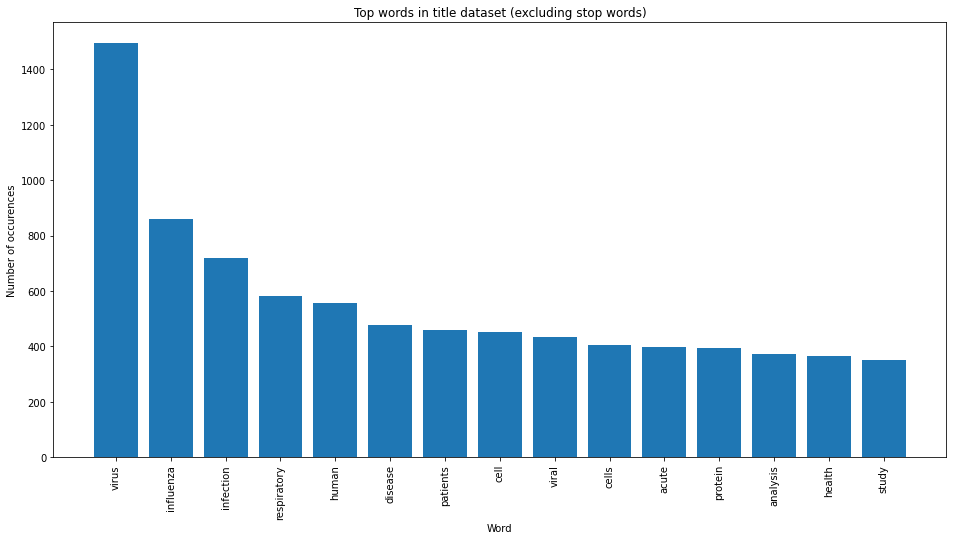

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in title dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [ ]:
df.shape[0]

10000

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

tagged_tweet = [TextBlob(df[i]).pos_tags for i in range(df.shape[0])]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


text blob is used to part-of-speech tagging

In [ ]:
tagged_tweet_df = pd.DataFrame({'tags':tagged_tweet})

word_counts = [] 
pos_counts = {}

for tweet in tagged_tweet_df[u'tags']:
    word_counts.append(len(tweet))
    for tag in tweet:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per tweet: ', np.mean(word_counts))

Total number of words:  123547
Mean number of words per tweet:  12.3547


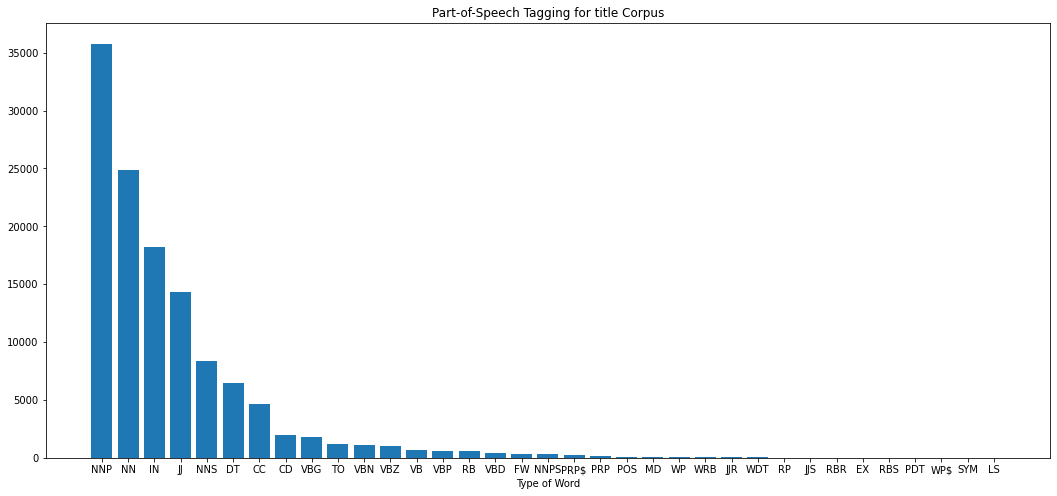

In [ ]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for title Corpus');
ax.set_xlabel('Type of Word');

text is converted to vector form

In [ ]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = df.sample(n=10000, random_state=0).values

print('Text before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Text after vectorization: \n{}'.format(small_document_term_matrix[123]))

Text before vectorization: The 45th Annual Meeting of the European Society for Blood and Marrow Transplantation: Physicians – Poster Session
Text after vectorization: 
  (0, 1033)	1
  (0, 8736)	1
  (0, 1976)	1
  (0, 8617)	1
  (0, 14359)	1
  (0, 10792)	1
  (0, 11075)	1
  (0, 12865)	1
  (0, 276)	1
  (0, 4985)	1
  (0, 13155)	1


4 number of topics are selected

In [ ]:
n_topics = 5

LSA model

In [ ]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [ ]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [ ]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [ ]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word)#.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [ ]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  virus influenza disease infection infectious respiratory analysis hepatitis protein vaccine
Topic 2:  respiratory patients acute health study infections syndrome care clinical severe
Topic 3:  influenza pandemic der h1n1 und avian 2009 viruses für china
Topic 4:  human cell cells protein viral expression using gene rna induced
Topic 5:  infection viral control patients associated response case respiratory report acute


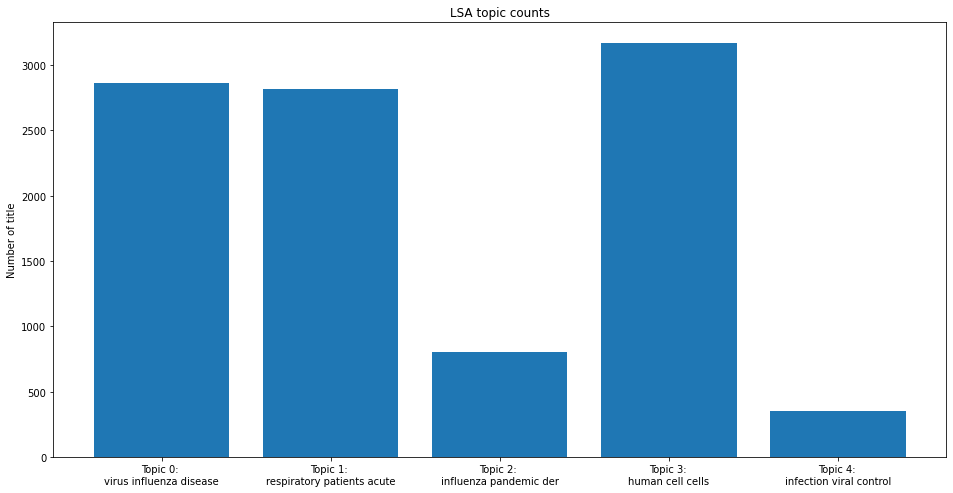

In [ ]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of title');
ax.set_title('LSA topic counts');
plt.show()

In [ ]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.011s...
[t-SNE] Computed neighbors for 10000 samples in 0.539s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.089600
[t-SNE] KL divergence after 2000 iterations: 0.962746


In [ ]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [ ]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [ ]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

LDA model

In [ ]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [ ]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [ ]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  virus infection cell human influenza cells protein viral infectious response
Topic 2:  virus rna influenza protein activity new disease human antiviral vaccine
Topic 3:  abstracts care health meeting medicine society annual research global european
Topic 4:  influenza patients virus study health infection pandemic human h1n1 clinical
Topic 5:  respiratory acute syndrome infections lung der infection severe virus und


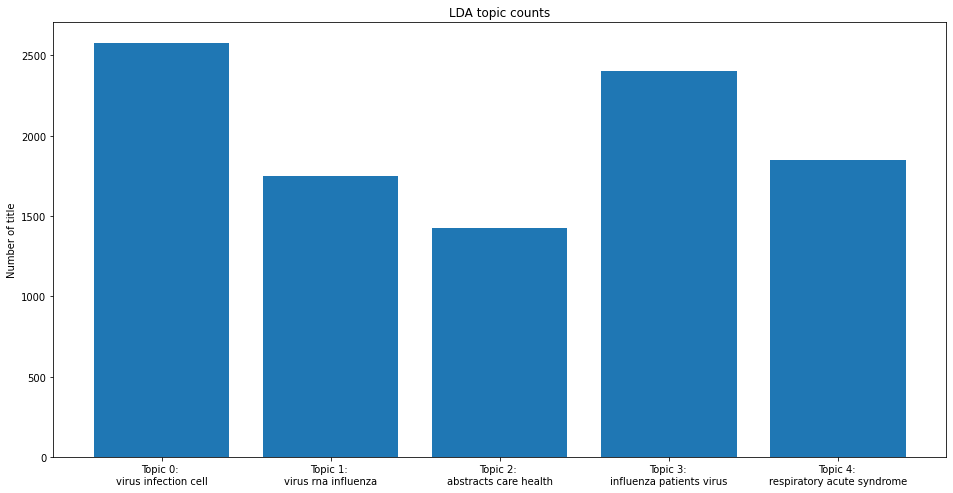

In [ ]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of title');

In [ ]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.010s...
[t-SNE] Computed neighbors for 10000 samples in 0.440s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000456
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.596664
[t-SNE] KL divergence after 2000 iterations: 0.934705


In [ ]:
top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

In [ ]:
import gensim
from gensim import corpora
bigram = gensim.models.Phrases(document_cleaned, min_count=5, threshold=100) 
#trigram = gensim.models.Phrases(bigram[document_cleaned], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_bigrams = make_bigrams(document_cleaned)# Creating the term dictionary of our courpus, 
# where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_words_bigrams)# Converting list of documents (corpus) 
# into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(text) for text in data_words_bigrams]# Build the LDA model
from gensim.models import LdaModel
lda_model = LdaModel(corpus=doc_term_matrix,id2word=dictionary,num_topics=5,random_state=100,
                     passes=10,alpha=0.31,eta=0.9099999999999999)
lda_model.print_topics()

[(0,
  '0.005*"rotavirus" + 0.004*"calf" + 0.001*"abstract" + 0.001*"gesellschaft" + 0.001*"diarrhoea" + 0.001*"intensivmedizin" + 0.001*"session" + 0.001*"index_volume" + 0.001*"jahrestagung" + 0.001*"eine"'),
 (1,
  '0.005*"cell" + 0.003*"transplantation" + 0.003*"rat" + 0.003*"class" + 0.002*"gene" + 0.002*"cancer" + 0.002*"stem" + 0.002*"effect" + 0.002*"expression" + 0.002*"complex"'),
 (2,
  '0.016*"patient" + 0.015*"infection" + 0.012*"respiratory" + 0.012*"acute" + 0.009*"syndrome" + 0.009*"influenza" + 0.007*"pandemic" + 0.007*"clinical" + 0.007*"severe" + 0.007*"study"'),
 (3,
  '0.011*"disease" + 0.007*"health" + 0.006*"infectious" + 0.005*"sars" + 0.005*"china" + 0.004*"outbreak" + 0.004*"global" + 0.004*"epidemic" + 0.004*"abstract" + 0.004*"model"'),
 (4,
  '0.032*"virus" + 0.012*"cell" + 0.011*"human" + 0.010*"infection" + 0.009*"protein" + 0.007*"viral" + 0.007*"influenza" + 0.007*"mouse" + 0.006*"vaccine" + 0.006*"response"')]

In [ ]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
lda_df = lda_model.get_document_topics(doc_term_matrix,minimum_probability=0)
lda_df = pd.DataFrame(list(lda_df))
num_topics = lda_model.num_topics
lda_df.columns = ['Topic'+str(i) for i in range(num_topics)]
for i in range(len(lda_df.columns)):
    lda_df.iloc[:,i]=lda_df.iloc[:,i].apply(lambda x: x[1])
lda_df['Automated_topic_id'] =lda_df.apply(lambda x: np.argmax(x),axis=1)
lda_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Automated_topic_id
0,0.025806,0.025727,0.894157,0.028813,0.025498,2
1,0.048430,0.048620,0.792380,0.052407,0.058164,2
2,0.047984,0.047979,0.506124,0.047732,0.350180,2
3,0.057449,0.058654,0.751952,0.066929,0.065016,2
4,0.036443,0.037384,0.037382,0.036581,0.852211,4


In [ ]:
# Compute Perplexity, a measure of how good the model is. lower the better.
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lda_c_v = coherence_model_lda.get_coherence()
print('\nCoherence Score using c_v: ', coherence_lda_c_v)# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lda_u_mass = coherence_model_lda.get_coherence()
print('\nCoherence Score using u_mass: ', coherence_lda_u_mass)


Perplexity:  -8.73705515463008

Coherence Score using c_v:  0.3992247648865688

Coherence Score using u_mass:  -9.146046024566251


In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=6d8179eecbad2740fcfda99b5012fc58fddcc6fdbb2ef03b734ae213a9d9a65b
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.147461 -0.002097       1        1  39.444783
3     -0.056386 -0.090764       2        1  22.242661
2     -0.049648  0.105728       3        1  22.234129
1     -0.002870 -0.001555       4        1   9.346848
0     -0.038557 -0.011313       5        1   6.731578, topic_info=                Term         Freq        Total Category  logprob  loglift
76             virus  1030.000000  1030.000000  Default  30.0000  30.0000
105          patient   295.000000   295.000000  Default  29.0000  29.0000
670      respiratory   227.000000   227.000000  Default  28.0000  28.0000
444            acute   218.000000   218.000000  Default  27.0000  27.0000
23              cell   431.000000   431.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
10512  subject_index     3.700079     7.492700   Topic5  -7.2990   1.9928
6011          volume     3.954472     8.714979   Topic5  -7.2325   1.9082
324         abstract     7.028745    73.905600   Topic5  -6.6574   0.3456
13265         author     3.309951     8.831286   Topic5  -7.4104   1.7170
1079         hygiene     3.192980     8.068783   Topic5  -7.4464   1.7713

[255 rows x 6 columns], token_table=       Topic      Freq                           Term
term                                                 
1139       1  0.021310                           2009
1139       2  0.021310                           2009
1139       3  0.937657                           2009
8544       1  0.038469                           2019
8544       2  0.923263                           2019
...      ...       ...                            ...
11857      3  0.203388  österreichischen_gesellschaft
11857      5  0.610165  österreichischen_gesellschaft
10171      1  0.159903                           über
10171      3  0.159903                           über
10171      5  0.639612                           über

[689 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 2, 1])

In [ ]:
from gensim.models import LsiModel
lsi_model = LsiModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary)
lsi_model.print_topics(num_topics=10,num_words=10)


[(0,
  '0.767*"virus" + 0.332*"infection" + 0.308*"influenza" + 0.186*"cell" + 0.128*"human" + 0.101*"protein" + 0.100*"disease" + 0.099*"respiratory" + 0.088*"mouse" + 0.077*"patient"'),
 (1,
  '0.615*"infection" + -0.526*"virus" + 0.250*"patient" + 0.210*"acute" + 0.198*"respiratory" + 0.154*"cell" + 0.131*"viral" + 0.122*"study" + 0.115*"human" + 0.103*"severe"'),
 (2,
  '-0.723*"cell" + 0.487*"influenza" + -0.242*"human" + 0.162*"pandemic" + -0.151*"protein" + 0.119*"infection" + -0.107*"expression" + 0.092*"h1n1" + -0.086*"mouse" + -0.085*"disease"'),
 (3,
  '-0.628*"influenza" + 0.493*"infection" + -0.356*"cell" + 0.226*"virus" + -0.219*"pandemic" + -0.157*"human" + 0.110*"respiratory" + -0.104*"h1n1" + -0.097*"patient" + -0.084*"vaccine"')]

In [ ]:
# Compute Coherence Score for llsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lsi_c_v = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using c_v: ', coherence_lsi_c_v)# Compute Coherence Score for llsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lsi_u_mass = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using u_mass: ', coherence_lsi_u_mass)


Coherence Score for LSI using c_v:  0.26058289757152886

Coherence Score for LSI using u_mass:  -6.03087962560761


Compare two models

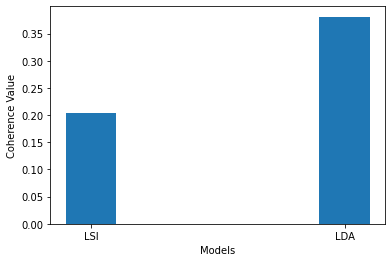

In [ ]:
from gensim.models import CoherenceModel
lda_topics = [[word for word, prob in topic] for topicid, topic in lda_model.show_topics(formatted=False)]
lsi_topics = [[word for word, prob in topic] for topicid, topic in lsi_model.show_topics(formatted=False)]
lsi_coherence = CoherenceModel(topics=lsi_topics, texts=data_words_bigrams, dictionary=dictionary, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=lda_topics, texts=data_words_bigrams, dictionary=dictionary, window_size=10).get_coherence()
import numpy as np
def topic_model_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')
topic_model_graph([lsi_coherence, lda_coherence],
                   ['LSI',  'LDA'])